<a href="https://colab.research.google.com/github/OSAKAAI/DEEP_LEARNING/blob/main/100_Epochs_LOST_ITEM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install opencv-python
!pip install pillow
!pip install IPython
!pip install base64
!pip install numpy
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement base64 (from versions: none)
ERROR: No matching distribution found for base64


<IPython.core.display.Javascript object>

 Image captured: photo.jpg

0: 960x1280 2 Electronic-devices-phones, 2208.3ms
Speed: 11.6ms preprocess, 2208.3ms inference, 1.5ms postprocess per image at shape (1, 3, 960, 1280)
 Detected objects:
 - Electronic-devices-phone (0.72)
 - Electronic-devices-phone (0.42)


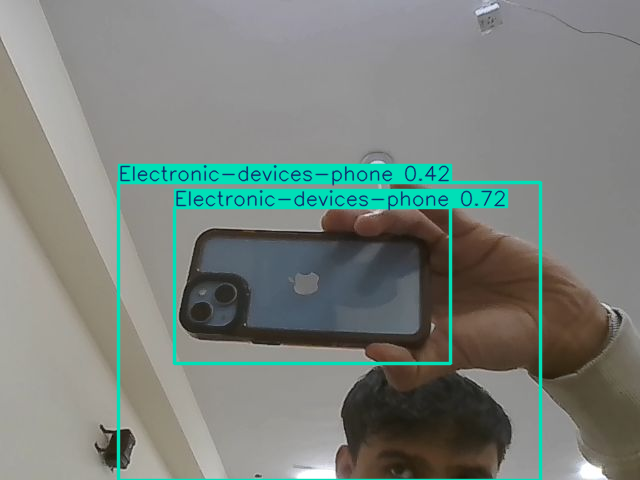

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image

# Function to capture photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Load trained YOLO model (replace with your trained weights)
model = YOLO('/content/best.pt')

# Capture a photo
img_path = take_photo()
print(f" Image captured: {img_path}")

# Read image
img = cv2.imread(img_path)

# Run detection
results = model(img)
r = results[0]

# Check detections
if len(r.boxes) == 0:
    print(" No objects detected.")
else:
    print(" Detected objects:")
    for box in r.boxes:
        cls = int(box.cls[0])
        label = r.names[cls]
        conf = box.conf[0]
        print(f" - {label} ({conf:.2f})")

# Display detection result with bounding boxes
r.show()